<a href="https://colab.research.google.com/github/omargalal232/HeartGuard/blob/main/heart_disease_prediction_main_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn xgboost tensorflow --quiet


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import joblib
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload heart.csv here


KeyboardInterrupt: 

In [ ]:
# Load dataset
df = pd.read_csv("heart.csv")

# Basic Info
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
df.head()


Shape: (303, 14)

Data Types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


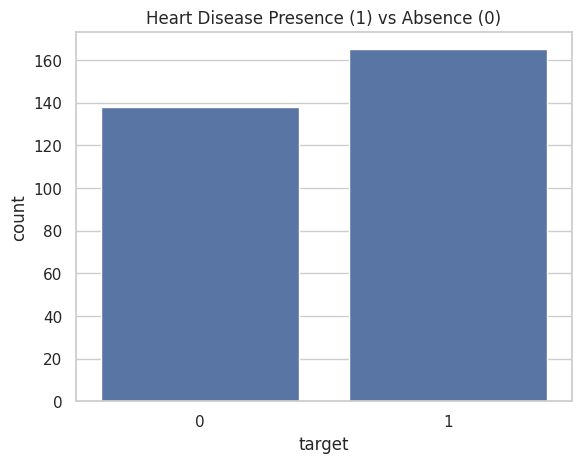

Feature Correlation with Target:
 target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [ ]:
# Target variable distribution
sns.countplot(x='target', data=df)
plt.title("Heart Disease Presence (1) vs Absence (0)")
plt.show()

# Correlation with target
corr = df.corr()['target'].abs().sort_values(ascending=False)
print("Feature Correlation with Target:\n", corr)


In [ ]:
# Define features and label
X = df.drop('target', axis=1)
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#random forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {acc * 100:.2f}%")

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Random Forest Accuracy: 83.61%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion Matrix:
 [[24  5]
 [ 5 27]]


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred_lr = logreg.predict(X_test_scaled)

print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr) * 100, "%")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


🔹 Logistic Regression Accuracy: 85.24590163934425 %
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:
 [[25  4]
 [ 5 27]]


In [ ]:
#svm
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

print("🔹 SVM Accuracy:", accuracy_score(y_test, y_pred_svm) * 100, "%")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


🔹 SVM Accuracy: 86.88524590163934 %
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:
 [[25  4]
 [ 4 28]]


In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("🔹 KNN Accuracy:", accuracy_score(y_test, y_pred_knn) * 100, "%")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


🔹 KNN Accuracy: 90.1639344262295 %
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion Matrix:
 [[27  2]
 [ 4 28]]


In [ ]:
#Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Build model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=16,
                    callbacks=[early_stop],
                    verbose=0)

# Evaluate
loss, acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"🔹 Neural Network Accuracy: {acc * 100:.2f}%")

# Predictions
y_pred_nn = model.predict(X_test_scaled)
y_pred_nn = (y_pred_nn > 0.5).astype(int)

print(classification_report(y_test, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))


🔹 Neural Network Accuracy: 86.89%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:
 [[25  4]
 [ 4 28]]


In [ ]:
!pip install xgboost


In [ ]:
#xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Accuracy
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"🔹 XGBoost Accuracy: {acc_xgb * 100:.2f}%")

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


🔹 XGBoost Accuracy: 81.97%

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Confusion Matrix:
 [[25  4]
 [ 7 25]]


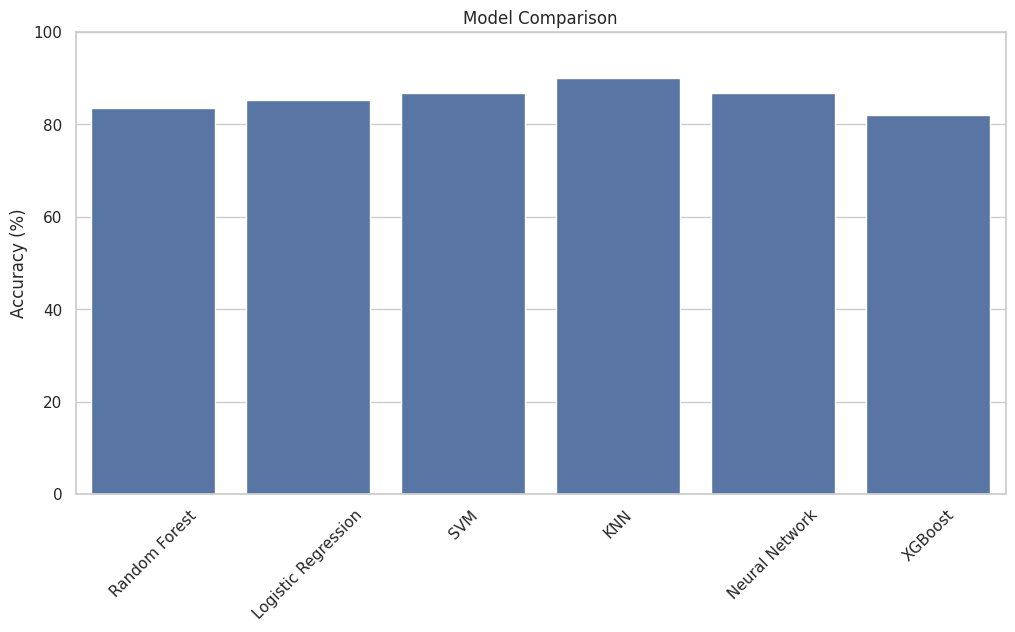

In [ ]:
#comparision between the models
model_names = ['Random Forest', 'Logistic Regression', 'SVM', 'KNN', 'Neural Network', 'XGBoost']
accuracies = [
    accuracy_score(y_test, y_pred),        # RF
    accuracy_score(y_test, y_pred_lr),     # Logistic Regression
    accuracy_score(y_test, y_pred_svm),    # SVM
    accuracy_score(y_test, y_pred_knn),    # KNN
    acc,                                   # Neural Net (from model.evaluate)
    acc_xgb                                # XGBoost
]

plt.figure(figsize=(12,6))
sns.barplot(x=model_names, y=np.array(accuracies)*100)
plt.ylabel("Accuracy (%)")
plt.title("Model Comparison")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()


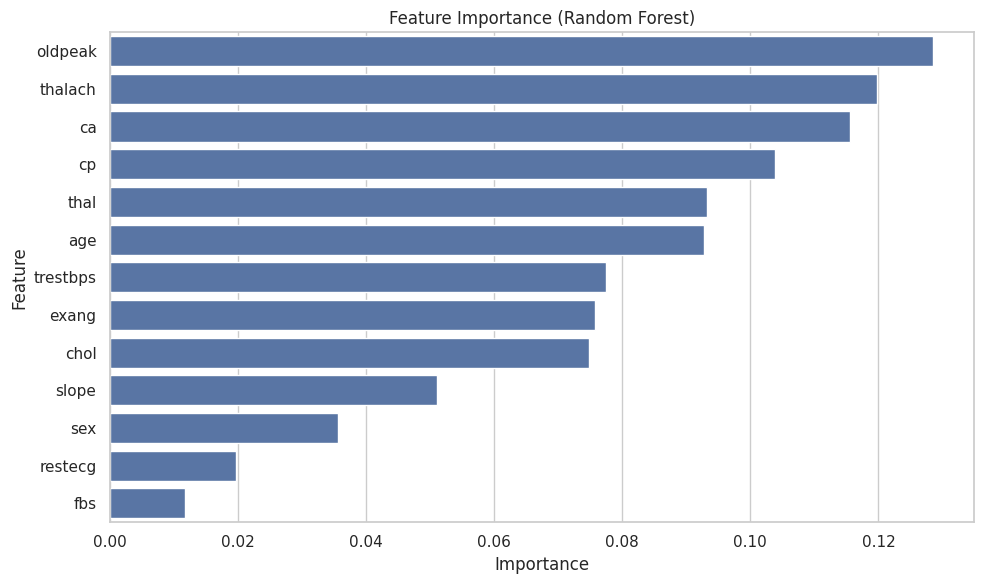

In [ ]:
#feature_importance(features that have hieghest impact)
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()



In [ ]:
#saving models
import joblib

# Save the KNN model
joblib.dump(knn, "heart_disease_knn_model.pkl")

# Save the scaler (important for preprocessing future data)
joblib.dump(scaler, "scaler.pkl")

print("✅ KNN Model and Scaler Saved Successfully as 'heart_disease_knn_model.pkl'.")



✅ KNN Model and Scaler Saved Successfully as 'heart_disease_knn_model.pkl'.


In [ ]:
from google.colab import files
files.download("heart_disease_knn_model.pkl")
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

import joblib
import numpy as np

# Load the saved model and scaler
knn_model = joblib.load("heart_disease_knn_model.pkl")
scaler = joblib.load("scaler.pkl")


In [ ]:
# Example new data input (replace these values with your actual test input)
# Format: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
new_data = np.array([[
    63,    # age
    1,     # sex (1 = male, 0 = female)
    2,     # cp (chest pain type: 0–3)
    145,   # trestbps (resting blood pressure)
    250,   # chol (serum cholesterol in mg/dl)
    1,     # fbs (fasting blood sugar > 120 mg/dl)
    2,     # restecg (resting ECG results: 0–2)
    150,   # thalach (maximum heart rate achieved)
    0,     # exang (exercise induced angina: 1 = yes; 0 = no)
    1.0,   # oldpeak (ST depression induced by exercise)
    0,     # slope (slope of the peak exercise ST segment)
    0,     # ca (number of major vessels: 0–3)
    2      # thal (thalassemia: 1 = normal, 2 = fixed defect, 3 = reversible defect)
]])
# Scale the new input
new_data_scaled = scaler.transform(new_data)
# Predict
prediction = knn_model.predict(new_data_scaled)

# Output result
if prediction[0] == 1:
    print("💓 High chance of heart disease.")
else:
    print("✅ Low chance of heart disease.")


💓 High chance of heart disease.
